In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import math

# Interpolação Polinomial

In [2]:
def plot(f, interval=[0, 10]):
    x = np.linspace(interval[0], interval[1], 1000)
    # y = f(x)
    y = list()
    for i in range(len(x)):
        y.append(f(x[i]))
    y = np.array(y)
    plt.figure()
    plt.plot(x, y, "bh", linewidth=1.1)



In [3]:
def lagrange_interpolation(lx, ly, x):
    # need: len(lx) == len(ly),  max(lx) >= x >= min(lx)
    res = 0
    for i in range(len(lx)):
        L = 1
        for j in range(len(lx)):
            if i != j:
                L *= (x - lx[j]) / (lx[i] - lx[j])
        res += L * ly[i]
    return res


In [4]:
class LagrangeInterpolation:
    def __init__(self, lx, ly):
        self.lx = lx
        self.ly = ly
    def polinom(self, x):
        res = 0
        for i in range(len(self.lx)):
            L = 1
            for j in range(len(self.lx)):
                if i != j:
                    L *= (x - self.lx[j]) / (self.lx[i] - self.lx[j])
            res += L * self.ly[i]
        return res



In [5]:
class DividedDiferences:
    def __init__(self, x, y):
        # x vetor de mesmo tamanho que y
        self.x = x
        self.y = y
        self.n = len(x)
        print(f"n = {self.n}")
        # self.coefs = self.find_coefs()
        # def find_coefs(self):
        f = np.zeros((self.n, self.n))
        for k in range(self.n):
            f[k, 0] = self.y[k]
        for i in range(1, self.n):
            for j in range(1, i + 1):
                f[i, j] = (f[i, j - 1] - f[i - 1, j - 1]) / (self.x[i] - self.x[i - j])
        self.coefs = f

    def polinom(self, p):
        soma = 0
        for i in range(self.n):
            res = self.coefs[i, i]
            for j in range(i):
                res *= p - self.x[j]
            soma += res
        return soma



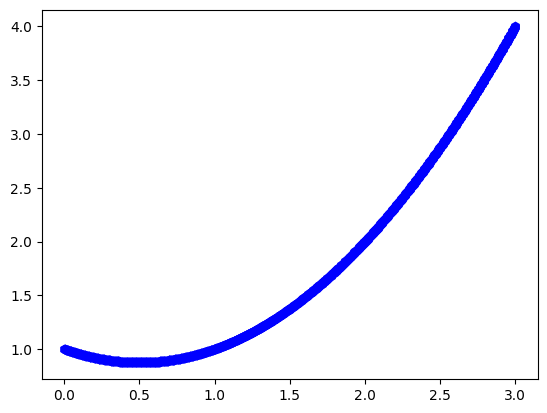

In [6]:
def f(x):
    return lagrange_interpolation([0, 2, 3], [1, 2, 4], x)


plot(f, [0, 3])



n = 3


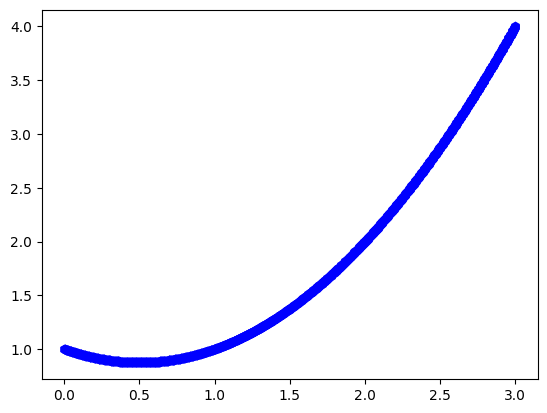

In [7]:
a = DividedDiferences([0, 2, 3], [1, 2, 4])
plot(a.polinom, [0, 3])



# Polinômio de Hermite

In [8]:
class HermiteDiferences:
    def __init__(self, x, y, Dy):
        # x vetor de mesmo tamanho que y
        self.x = x
        self.y = y
        self.Dy = Dy
        n = len(x)
        z = []
        Q = np.zeros((2 * n, 2 * n))
        for i in range(n):
            z.append(self.x[i])
            z.append(self.x[i])
            Q[2 * i, 0] = self.y[i]
            Q[2 * i + 1, 0] = self.y[i]
            Q[2 * i + 1, 1] = self.Dy[i]
            if i != 0:
                Q[2 * i, 1] = (Q[2 * i, 0] - Q[2 * i - 1, 0]) / (
                    z[2 * i] - z[2 * i - 1]
                )
        for i in range(2, 2 * n):
            for j in range(2, i + 1):
                Q[i, j] = (Q[i, j - 1] - Q[i - 1, j - 1]) / (z[i] - z[i - j])
        self.Q = Q
        self.z = z

    def polinom(self, p):
        soma = 0
        for i in range(len(self.Q)):
            res = self.Q[i, i]
            for j in range(i):
                res *= p - self.z[j]
            soma += res
        return soma



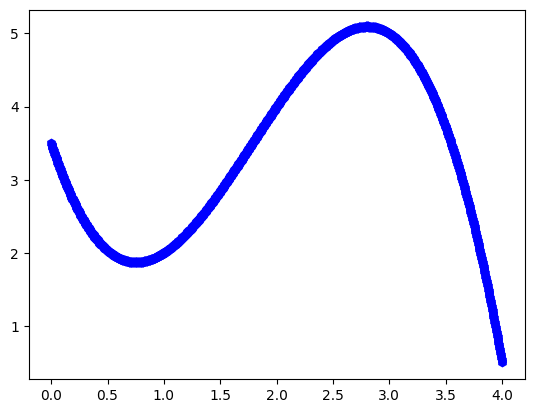

In [9]:
a = HermiteDiferences([1, 3], [2, 5], [1, -1])
plot(a.polinom, [0, 4])



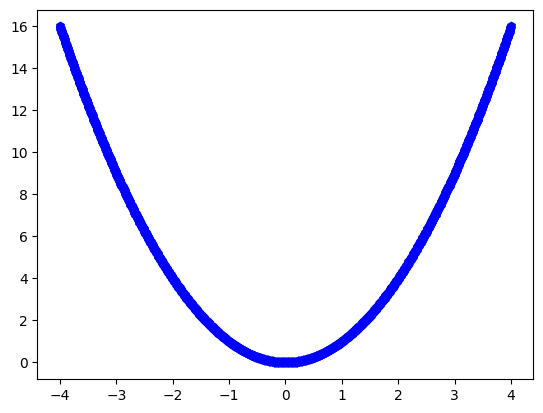

In [10]:
b = HermiteDiferences([-1, 0, 1, 3], [1, 0, 1, 9], [-2, 0, 2, 6])
plot(b.polinom, [-4, 4])



In [11]:
for x in np.linspace(-10, 10, 20):
    print(x)
    if b.polinom(x) != x ** 2:
        print("erro = ", abs(b.polinom(x) - x ** 2))



-10.0
-8.947368421052632
-7.894736842105264
-6.842105263157895
-5.7894736842105265
-4.736842105263158
-3.6842105263157894
-2.6315789473684212
erro =  8.881784197001252e-16
-1.578947368421053
-0.526315789473685
0.5263157894736832
erro =  2.220446049250313e-16
1.5789473684210513
2.6315789473684212
erro =  8.881784197001252e-16
3.6842105263157894
erro =  1.7763568394002505e-15
4.7368421052631575
erro =  3.552713678800501e-15
5.789473684210526
6.842105263157894
7.894736842105264
erro =  7.105427357601002e-15
8.94736842105263
10.0


# Splines cúbicos

In [37]:
class NaturalCubicSpline:
    def __init__(self, lx, ly):
        self.lx = lx
        self.ly = ly
        self.n = len(lx)
        self.a = self.ly[:-1]
        self.b, self.c, self.d = self.gera_spline()
        self.coefs = [self.a, self.b, self.c, self.d]
    def gera_spline(self):
        h = list()
        for i in range(self.n - 1):
            h.append(self.lx[i + 1] - self.lx[i])
        alpha = [0.0]
        for i in range(1, self.n - 1):
            res = (3 * (self.ly[i + 1] - self.ly[i]) / h[i]) - ( 3 * (self.ly[i] - self.ly[i - 1]) / h[i - 1] )
            alpha.append(res)
        l = [1.0]
        u = [0.0]
        z = [0.0]
        for i in range(1, self.n - 1):
            l.append(2 * (self.lx[i + 1] - self.lx[i - 1]) - (h[i - 1] * u[i - 1]))
            u.append(h[i] / l[i])
            z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])
        l.append(1.0)
        z.append(0.0)
        b = np.array([0.0 for i in range(self.n)])
        c = np.array([0.0 for i in range(self.n)])
        d = np.array([0.0 for i in range(self.n)])
        for j in range(self.n - 2, -1, -1):
            c[j] = z[j] - u[j] * c[j + 1]
            b[j] = (self.ly[j + 1] - self.ly[j]) / h[j] - h[j] * ( c[j + 1] + 2 * c[j] ) / 3
            d[j] = (c[j + 1] - c[j]) / (3 * h[j])
        return b[:-1], c[:-1], d[:-1]

    def polinom(self, p):
        if p < self.lx[0] or p > self.lx[self.n - 1]:
            return 0
        for i in range(self.n - 1):
            if p >= self.lx[i]:
                X = p - self.lx[i]
                return (  self.a[i] + self.b[i] * X + self.c[i] * X ** 2 + self.d[i] * X ** 3 )




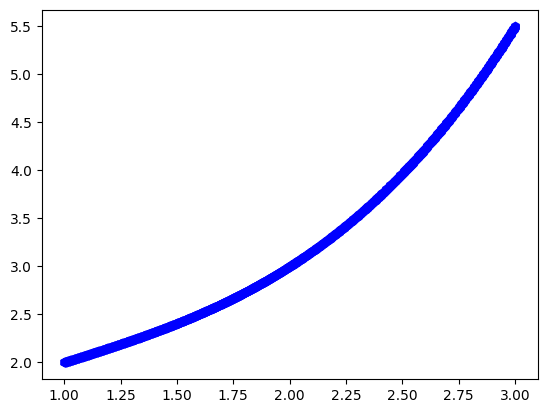

In [38]:
sss = NaturalCubicSpline([1, 2, 3], [2, 3, 5])
plot(sss.polinom, [1, 3])



In [23]:
class FixedCubicSpline:
    def __init__(self, lx, ly, FPO, FPN):
        self.lx = lx
        self.ly = ly
        self.n = len(lx)
        self.a = self.ly[:-1]
        self.FPO = FPO
        self.FPN = FPN
        self.b, self.c, self.d = self.gera_spline()
        self.coefs = [self.a, self.b, self.c, self.d]
    def gera_spline(self):
        h = list()
        for i in range(self.n - 1):
            h.append(self.lx[i + 1] - self.lx[i])
        alpha = [3*(self.ly[1]-self.ly[0])/h[0] - 3*self.FPO]
        for i in range(1,self.n-1):
            res = (3 * (self.ly[i + 1] - self.ly[i]) / h[i]) - (3 * (self.ly[i] - self.ly[i - 1]) / h[i - 1])
            alpha.append(res)


        alpha.append(3*self.FPN - 3*(self.ly[self.n-1]-self.ly[self.n-2])/h[self.n-2])


        l = [2*h[0]]
        u = [0.5]
        z = [alpha[0]/l[0]]
        for i in range(1, self.n - 1):
            l.append(2 * (self.lx[i + 1] - self.lx[i - 1]) - (h[i - 1] * u[i - 1]))
            u.append(h[i] / l[i])
            z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])
        l.append(h[self.n-2]*(2-u[self.n-2]))  ###
        z.append((alpha[self.n-1]-h[self.n-2]*z[self.n-2])/l[self.n-1])

        b = np.array([0.0 for i in range(self.n)])
        c = np.array([0.0 for i in range(self.n)])
        d = np.array([0.0 for i in range(self.n)])
        c[self.n-1] = z[self.n-1]

        for j in range(self.n - 2, -1, -1):
            c[j] = z[j] - u[j] * c[j + 1]
            b[j] = (self.ly[j + 1] - self.ly[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
            d[j] = (c[j + 1] - c[j]) / (3 * h[j])
        return b[:-1], c[:-1], d[:-1]


    def polinom(self, p):
        if p < self.lx[0] or p > self.lx[self.n - 1]:
            return 0
        for i in range(self.n - 1):
            if p >= self.lx[i]:
                X = p - self.lx[i]
                return ( self.a[i] + self.b[i] * X + self.c[i] * X ** 2 + self.d[i] * X ** 3 )




In [39]:
nnn = NaturalCubicSpline([0,1, 2, 3], [np.exp(0),np.exp(1),np.exp(2),np.exp(3)])
nnn.coefs


[[1.0, 2.718281828459045, 7.38905609893065],
 array([1.46599761, 2.22285026, 8.80976965]),
 array([0.        , 0.75685264, 5.83006675]),
 array([ 0.25228421,  1.69107137, -1.94335558])]

In [40]:
#sss = FixedCubicSpline([1, 2, 3], [2, 3, 5],0,0)
sss = FixedCubicSpline([0,1, 2, 3], [np.exp(0),np.exp(1),np.exp(2),np.exp(3)],1,np.exp(3))
sss.coefs


[[1.0, 2.718281828459045, 7.38905609893065],
 array([1.        , 2.71016299, 7.32651634]),
 array([0.4446825 , 1.26548049, 3.35087286]),
 array([0.27359933, 0.69513079, 2.01909162])]

0      0.000000e+00
1      4.959623e-07
2      1.972306e-06
3      4.411779e-06
4      7.797210e-06
           ...     
995    4.588765e+00
996    4.615436e+00
997    4.642233e+00
998    4.669159e+00
999    4.696213e+00
Length: 1000, dtype: float64

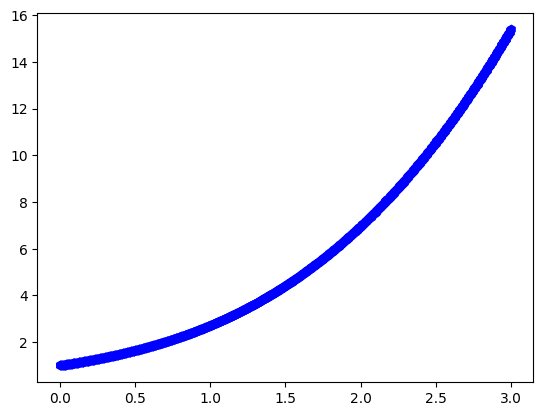

In [41]:
sss = FixedCubicSpline([0,1, 2, 3], [np.exp(0),np.exp(1),np.exp(2),np.exp(3)],1,np.exp(3))
plot(sss.polinom, [0, 3])
erro = []
for x in np.linspace(0,3,1000):
    erro.append(abs(sss.polinom(x)-np.exp(x)))
erro = pd.Series(erro)
erro

In [32]:
np.exp(3)

20.085536923187668